# Comcast Telecom Consumer Complaints

DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
Dataset Description :

Field	Description
longitude	(signed numeric - float) : Longitude value for the block in California, USA
latitude	(numeric - float ) : Latitude value for the block in California, USA
housing_median_age	(numeric - int ) : Median age of the house in the block
total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
population	(numeric - int ) : Count of the total number of population in the block
households	(numeric - int ) : Count of the total number of households in the block
median_income	(numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block
 

Dataset Size : 20640 rows x 10 columns

In [286]:
import pandas as pd
import numpy as np
import datetime
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [287]:
%config IPCompleter.greedy=True

In [288]:
ca = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [289]:
ca.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [290]:
ca.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [291]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [292]:
ca.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [293]:
ca["Received Via"].unique() 

array(['Customer Care Call', 'Internet'], dtype=object)

In [294]:
ca["City"].unique() 

array(['Abingdon', 'Acworth', 'Adrian', 'Alameda', 'Albuquerque',
       'Albuquerqur', 'Alexandria', 'Algonquin', 'Aliquippa', 'Allston',
       'Aloha', 'Alpharetta', 'Alvin', 'Ambridge', 'Amesbury', 'Amherst',
       'Andover', 'Angels Camp', 'Ann Arbor', 'Annapolis', 'Annville',
       'Anoka', 'Antioch', 'Aptos', 'Arlington', 'Arlington Heights',
       'Arvada', 'Ashland', 'Athens', 'Atlanta', 'Atlantic Beach',
       'Attalla', 'Attica', 'Auburn', 'Augusta', 'Aurora', 'Austell',
       'Austin', 'Avon', 'Ayer', 'Baden', 'Bainbridge Island',
       'Bala Cynwyd', 'Ballston Lake', 'Baltimore', 'Bargersville',
       'Barnegat', 'Barrington', 'Bartlett', 'Bartonville', 'Bath',
       'Battle Ground', 'Beach Haven', 'Beachwood', 'Beale Afb',
       'Beaver Falls', 'Beaverton', 'Bedford', 'Bel Air', 'Belleville',
       'Bellevue', 'Bellingham', 'Belmont', 'Belton', 'Beltsville',
       'Belvidere', 'Bensalem', 'Berkeley', 'Berkeley Lake',
       'Berkeley Spring', 'Berwyn', 'Bethesd

In [295]:
ca["State"].unique() 

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [296]:
ca["Status"].unique() 

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [297]:
ca["Filing on Behalf of Someone"].unique() 

array(['No', 'Yes'], dtype=object)

In [298]:
ca["Customer Complaint"].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [299]:
ca

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [300]:
ca['Status'] = ca['Status'].apply(lambda x: 'Open' if (x == 'Pending' or x == 'Open') else 'Closed')
ca['Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [301]:
ca

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Closed,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Closed,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Closed,No


In [302]:
ca_d = pd.concat([ca.drop(["Customer Complaint","Date","Time","City","State","Filing on Behalf of Someone","Status","Received Via"], axis=1), pd.get_dummies(ca['Status'], drop_first=True), pd.get_dummies(ca['Received Via'], columns="Call_Int", drop_first=True)], axis=1)

In [303]:
ca_d

,Ticket #,Date_month_year,Zip code,Open,Internet
0,250635,22-Apr-15,21009,0,0
1,223441,04-Aug-15,30102,0,1
2,242732,18-Apr-15,30101,0,1
3,277946,05-Jul-15,30101,1,1
4,307175,26-May-15,30101,0,1
...,...,...,...,...,...
2219,213550,04-Feb-15,32466,0,0
2220,318775,06-Feb-15,48197,0,0
2221,331188,06-Sep-15,48197,0,1
2222,360489,23-Jun-15,48197,0,0


In [304]:
ca_d = ca_d.rename(columns={'Internet': 'Call_Int'})

In [305]:
ca_d

,Ticket #,Date_month_year,Zip code,Open,Call_Int
0,250635,22-Apr-15,21009,0,0
1,223441,04-Aug-15,30102,0,1
2,242732,18-Apr-15,30101,0,1
3,277946,05-Jul-15,30101,1,1
4,307175,26-May-15,30101,0,1
...,...,...,...,...,...
2219,213550,04-Feb-15,32466,0,0
2220,318775,06-Feb-15,48197,0,0
2221,331188,06-Sep-15,48197,0,1
2222,360489,23-Jun-15,48197,0,0


In [306]:
ca_d[['Date','Month','Year']] = ca_d.Date_month_year.str.split("-",expand=True,)

In [307]:
ca_d

,Ticket #,Date_month_year,Zip code,Open,Call_Int,Date,Month,Year
0,250635,22-Apr-15,21009,0,0,22,Apr,15
1,223441,04-Aug-15,30102,0,1,04,Aug,15
2,242732,18-Apr-15,30101,0,1,18,Apr,15
3,277946,05-Jul-15,30101,1,1,05,Jul,15
4,307175,26-May-15,30101,0,1,26,May,15
...,...,...,...,...,...,...,...,...
2219,213550,04-Feb-15,32466,0,0,04,Feb,15
2220,318775,06-Feb-15,48197,0,0,06,Feb,15
2221,331188,06-Sep-15,48197,0,1,06,Sep,15
2222,360489,23-Jun-15,48197,0,0,23,Jun,15


In [308]:
ca_d = ca_d.drop(["Date_month_year"], axis=1)

In [309]:
ca_d.Month.unique()

array(['Apr', 'Aug', 'Jul', 'May', 'Dec', 'Jun', 'Jan', 'Nov', 'Feb',
       'Sep', 'Mar', 'Oct'], dtype=object)

In [310]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [311]:
ca_d.Month = ca_d.Month.map(d)

In [312]:
ca_d

,Ticket #,Zip code,Open,Call_Int,Date,Month,Year
0,250635,21009,0,0,22,4,15
1,223441,30102,0,1,04,8,15
2,242732,30101,0,1,18,4,15
3,277946,30101,1,1,05,7,15
4,307175,30101,0,1,26,5,15
...,...,...,...,...,...,...,...
2219,213550,32466,0,0,04,2,15
2220,318775,48197,0,0,06,2,15
2221,331188,48197,0,1,06,9,15
2222,360489,48197,0,0,23,6,15


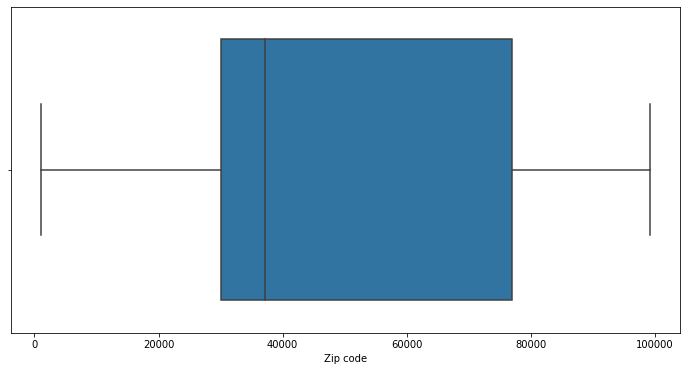

In [313]:
num_features=['Zip code']
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ca_d,ax=ax)

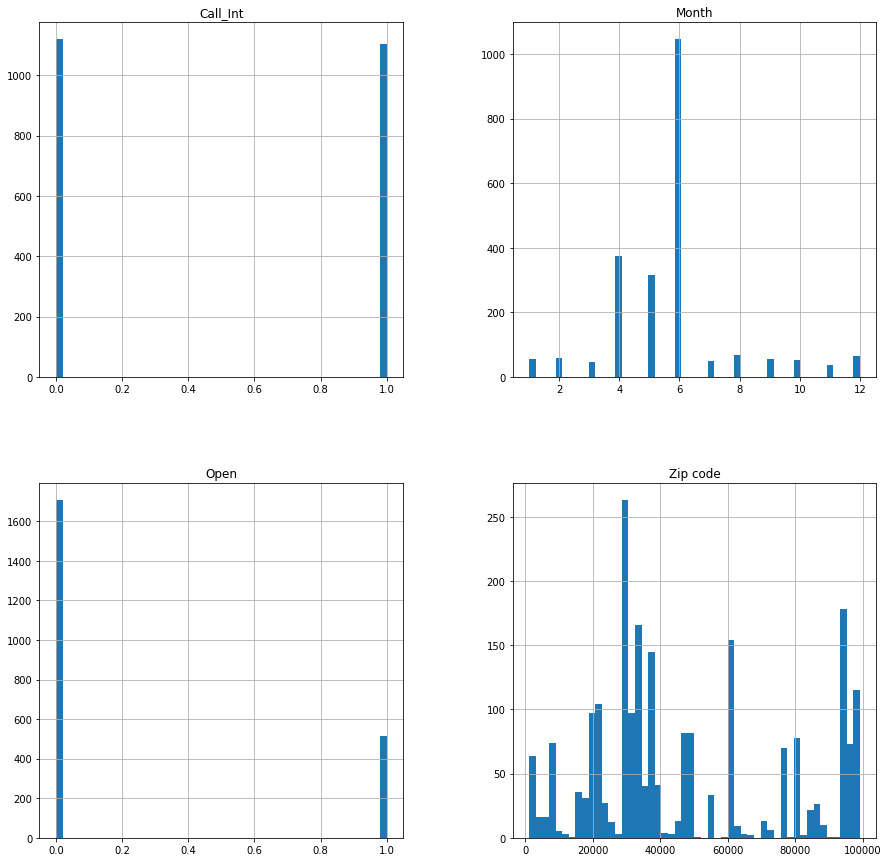

In [314]:
ca_d.hist(bins=50, figsize=(15,15))
plt.show()

          Zip code      Open  Call_Int     Month
Zip code  1.000000  0.039290  0.000426  0.009121
Open      0.039290  1.000000  0.010916  0.025553
Call_Int  0.000426  0.010916  1.000000  0.002061
Month     0.009121  0.025553  0.002061  1.000000


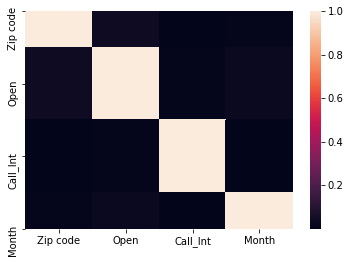

In [315]:
cm=ca_d.corr(method='pearson',)
print (cm)
ax = sns.heatmap(cm, )

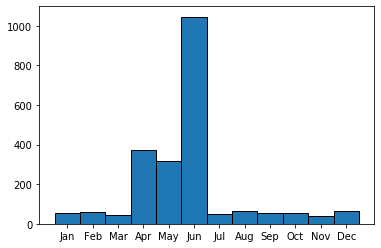

In [316]:
fig, ax = plt.subplots()
bins = np.arange(1,14)
ax.hist(ca_d["Month"], bins = bins, edgecolor="k", align='left')
ax.set_xticks(bins[:-1])
ax.set_xticklabels([datetime.date(1900,i,1).strftime('%b') for i in bins[:-1]] )
plt.show()

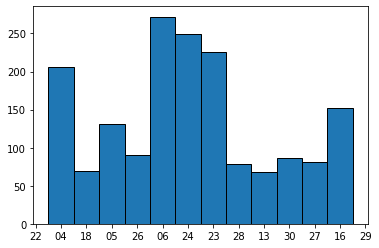

In [317]:
fig, ax = plt.subplots()
bins = np.arange(1,14)
ax.hist(ca_d["Date"], bins = bins, edgecolor="k", align='left')
plt.show()